In [1]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, ElasticNet
import csv

In [101]:
path1 = f"./data/round_2/prices_round_2_day_-1.csv"
path2 = f"./data/round_2/prices_round_2_day_0.csv"
path3 = f"./data/round_2/prices_round_2_day_1.csv"
results_path = f"./data/round_2/algo_results.csv"

In [102]:
data1 = pd.read_csv(path1, delimiter=";", parse_dates=True)
data2 = pd.read_csv(path2, delimiter=";", parse_dates=True)
data3 = pd.read_csv(path3, delimiter=";", parse_dates=True)
results_data = pd.read_csv(results_path, delimiter=";", parse_dates=True)

# Exploratory Data Analysis

## Criteria:
### - Whenever **sunlight** exposure < 7 hours a day, production of orchids will decrease 4% every 10 minutes
### - Ideal **humidity** for orchids is between 60% and 80%. When outside this range, production falls 2% every 5% change in humidity
### - Orchids that cannot be **stored** correctly will deteriorate, and good **storage** comes for 0.1 seashells per orchid per timestamp

In [90]:
data = pd.concat([data1, data2, data3], ignore_index=True)
data

,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,DAY
0,0,1200.00,1.5,10.5,-2.0,2500.0000,79.00000,-1
1,100,1201.75,1.5,9.5,-2.0,2499.4197,79.00410,-1
2,200,1201.75,1.5,9.5,-2.0,2498.8457,79.00821,-1
3,300,1201.75,1.5,9.5,-2.0,2498.2780,79.01234,-1
4,400,1201.75,1.5,9.5,-2.0,2497.7166,79.01649,-1
...,...,...,...,...,...,...,...,...
29998,999600,1036.25,0.9,9.5,-5.0,2299.9436,69.93549,1
29999,999700,1036.25,0.9,9.5,-5.0,2299.9556,69.95153,1
30000,999800,1036.25,0.9,9.5,-5.0,2299.9690,69.96762,1
30001,999900,1034.25,0.9,9.5,-5.0,2299.9840,69.98378,1


In [91]:
orchid_results_data = results_data[results_data["product"] == "ORCHIDS"]
orchid_results_data

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
1,1,200,ORCHIDS,1094,16,1093.0,11.0,1092.0,3.0,1101,6,1102.0,19.0,1103.0,2.0,1097.5,0.0
5,1,300,ORCHIDS,1093,10,1092.0,4.0,1085.0,52.0,1101,10,1102.0,4.0,1109.0,52.0,1097.0,0.0
7,1,400,ORCHIDS,1093,10,1092.0,3.0,1086.0,51.0,1101,10,1102.0,3.0,1109.0,51.0,1097.0,0.0
10,1,500,ORCHIDS,1094,5,1093.0,4.0,1086.0,41.0,1102,5,1103.0,4.0,1109.0,41.0,1098.0,0.0
13,1,600,ORCHIDS,1093,10,1092.0,3.0,1086.0,49.0,1101,10,1102.0,3.0,1109.0,49.0,1097.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2980,1,99500,ORCHIDS,1067,5,1066.0,4.0,1060.0,43.0,1074,5,1075.0,4.0,1082.0,43.0,1070.5,0.0
2982,1,99600,ORCHIDS,1068,7,1067.0,2.0,1061.0,46.0,1075,7,1076.0,2.0,1083.0,46.0,1071.5,0.0
2985,1,99700,ORCHIDS,1068,5,1067.0,3.0,1061.0,48.0,1076,5,1077.0,3.0,1083.0,48.0,1072.0,0.0
2990,1,99800,ORCHIDS,1068,8,1067.0,3.0,1061.0,49.0,1075,8,1076.0,3.0,1083.0,49.0,1071.5,0.0


In [92]:
combined_orchid_data = pd.merge(data3, orchid_results_data.drop(columns=["day", "product", "profit_and_loss"]), on=["timestamp"])
combined_orchid_data # has no NaN values in any column

,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,DAY,bid_price_1,bid_volume_1,...,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price
0,200,1096.75,0.9,9.5,-5.0,2099.5132,70.045395,1,1094,16,...,11.0,1092.0,3.0,1101,6,1102.0,19.0,1103.0,2.0,1097.5
1,300,1097.00,0.9,9.5,-5.0,2099.2683,70.068030,1,1093,10,...,4.0,1085.0,52.0,1101,10,1102.0,4.0,1109.0,52.0,1097.0
2,400,1097.25,0.9,9.5,-5.0,2099.0225,70.090640,1,1093,10,...,3.0,1086.0,51.0,1101,10,1102.0,3.0,1109.0,51.0,1097.0
3,500,1097.75,0.9,9.5,-5.0,2098.7756,70.113200,1,1094,5,...,4.0,1086.0,41.0,1102,5,1103.0,4.0,1109.0,41.0,1098.0
4,600,1097.25,0.9,9.5,-5.0,2098.5280,70.135720,1,1093,10,...,3.0,1086.0,49.0,1101,10,1102.0,3.0,1109.0,49.0,1097.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,99500,1070.75,1.1,8.5,-5.5,1701.2242,84.906700,1,1067,5,...,4.0,1060.0,43.0,1074,5,1075.0,4.0,1082.0,43.0,1070.5
994,99600,1071.75,1.1,8.5,-5.5,1700.9775,84.925300,1,1068,7,...,2.0,1061.0,46.0,1075,7,1076.0,2.0,1083.0,46.0,1071.5
995,99700,1072.00,1.1,8.5,-5.5,1700.7317,84.943930,1,1068,5,...,3.0,1061.0,48.0,1076,5,1077.0,3.0,1083.0,48.0,1072.0
996,99800,1071.75,1.1,8.5,-5.5,1700.4869,84.962590,1,1068,8,...,3.0,1061.0,49.0,1075,8,1076.0,3.0,1083.0,49.0,1071.5


<Axes: >

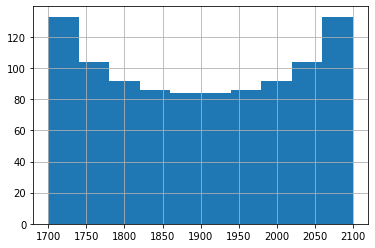

In [79]:
combined_orchid_data["SUNLIGHT"].hist()

<Axes: >

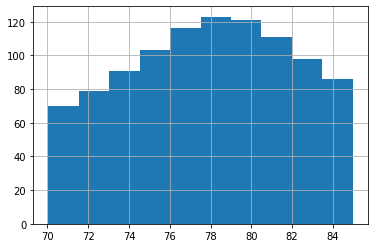

In [80]:
combined_orchid_data["HUMIDITY"].hist()

<Axes: >

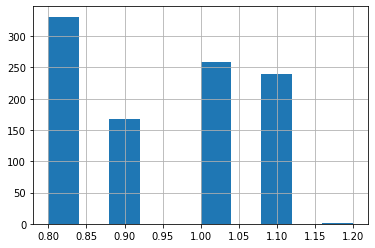

In [81]:
combined_orchid_data["TRANSPORT_FEES"].hist()

<Axes: >

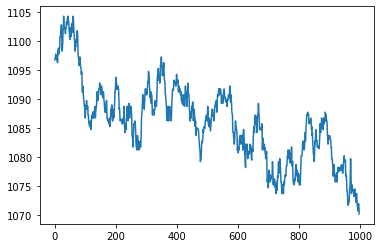

In [82]:
combined_orchid_data["ORCHIDS"].plot()

<Axes: >

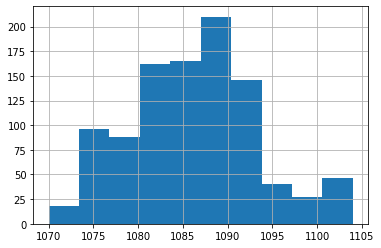

In [83]:
combined_orchid_data["mid_price"].hist()

In [93]:
# create weighted average price column
# combined_orchid_data["weighted_average_price"] = np.nan
# for row in combined_orchid_data.iterrows():
#     avg_bid = row[1]["bid_price"]
#     row[1]["weighted_average_price"] = (row[1]["mid_price"] + row[1]["ORCHIDS"]) / 3

# combined_orchid_data

parsed_data = combined_orchid_data[["mid_price"]]
parsed_data

,mid_price
0,1097.5
1,1097.0
2,1097.0
3,1098.0
4,1097.0
...,...
993,1070.5
994,1071.5
995,1072.0
996,1071.5


In [94]:
def add_lags(parsed_data):
    lags = 3
    for i in range(1, lags + 1):
        parsed_data[f'lag{i}'] = parsed_data['mid_price'].shift(i)

    parsed_data.dropna(inplace=True)
    return parsed_data

In [95]:
parsed_data = add_lags(parsed_data)
parsed_data

C:\Users\HP\AppData\Local\Temp\ipykernel_9324\3409658386.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parsed_data[f'lag{i}'] = parsed_data['mid_price'].shift(i)
c:\Python310\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,mid_price,lag1,lag2,lag3
3,1098.0,1097.0,1097.0,1097.5
4,1097.0,1098.0,1097.0,1097.0
5,1097.0,1097.0,1098.0,1097.0
6,1097.0,1097.0,1097.0,1098.0
7,1097.0,1097.0,1097.0,1097.0
...,...,...,...,...
993,1070.5,1071.5,1071.5,1072.5
994,1071.5,1070.5,1071.5,1071.5
995,1072.0,1071.5,1070.5,1071.5
996,1071.5,1072.0,1071.5,1070.5


In [96]:
x = parsed_data[["lag1", "lag2", "lag3"]] 
x

,lag1,lag2,lag3
3,1097.0,1097.0,1097.5
4,1098.0,1097.0,1097.0
5,1097.0,1098.0,1097.0
6,1097.0,1097.0,1098.0
7,1097.0,1097.0,1097.0
...,...,...,...
993,1071.5,1071.5,1072.5
994,1070.5,1071.5,1071.5
995,1071.5,1070.5,1071.5
996,1072.0,1071.5,1070.5


In [97]:
# y = parsed_data["mid_price"]
# y

3      1098.0
4      1097.0
5      1097.0
6      1097.0
7      1097.0
        ...  
993    1070.5
994    1071.5
995    1072.0
996    1071.5
997    1070.5
Name: mid_price, Length: 995, dtype: float64

In [98]:
# model = LinearRegression()
# model.fit(x, y)
# pred = model.predict(x)
# parsed_data["pred"] = pred
# parsed_data

C:\Users\HP\AppData\Local\Temp\ipykernel_9324\1984244663.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parsed_data["pred"] = pred


,mid_price,lag1,lag2,lag3,pred
3,1098.0,1097.0,1097.0,1097.5,1096.888077
4,1097.0,1098.0,1097.0,1097.0,1097.665798
5,1097.0,1097.0,1098.0,1097.0,1096.941572
6,1097.0,1097.0,1097.0,1098.0,1096.927555
7,1097.0,1097.0,1097.0,1097.0,1096.848599
...,...,...,...,...,...
993,1070.5,1071.5,1071.5,1072.5,1071.704797
994,1071.5,1070.5,1071.5,1071.5,1070.808642
995,1072.0,1071.5,1070.5,1071.5,1071.532869
996,1071.5,1072.0,1071.5,1070.5,1071.955485


In [99]:
# print("Coefficients:", model.coef_)
# print("Intercept:", model.intercept_)
# print("Accuracy:", model.score(x, y))

Coefficients: [0.81719917 0.09297269 0.07895589]
Intercept: 11.775448479708984
Accuracy: 0.9693323340718014
